**420-A58-SF - Algorithmes d'apprentissage non supervisé - Hiver 2023 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2023 Mikaël Swawola
<br/>
![Travaux Pratiques - DBSCAN (implémentation / scikit-learn)](static/01-04-banner.png)
<br/>
**Objectif:** cet atelier a pour objectif l'implémentation en Python de l'algorithme DBSCAN, ainsi que sa mise en oeuvre avec la libraire scikit-learn

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import queue
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from helpers import generate_toy_dataset

## 1 - Génération et visualisation des données

Nous allons tout d'abord générer un jeu de données d'école permettant une bonne illustration des forces de l'algorithme DBSCAN

**Exercice 1-1 - Consultez la fonction `generate_toy_dataset` et exécutez le code ci-dessous**

Text(0, 0.5, 'x1')

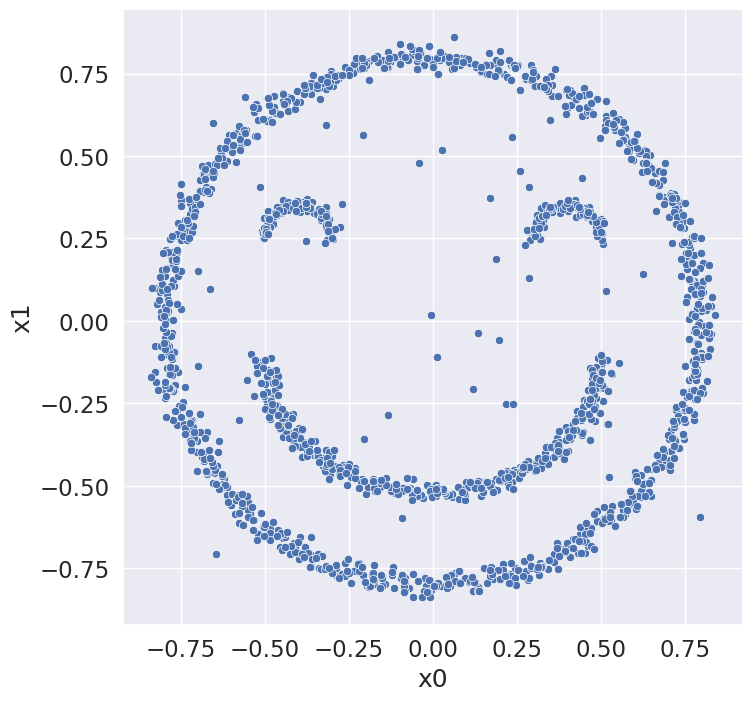

In [3]:
X = generate_toy_dataset(seed=2021)

# Configuration de la visualisation
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize']=(8,8)
_ = sns.scatterplot(x=X[:,0], y=X[:,1])
plt.xlabel('x0')
plt.ylabel('x1')

## 2 - Implémentation de l'algorithme DBSCAN

Nous allons maintenant implémenter l'algorithme DBSCAN. Cette implémention sera réalisée en différentes étapes.

**Exercice 2-1 - Compléter la fonction `eps_voisinage` permettant de trouver tous les points de l'epsilon-voisinage. Afin de vérifier la bonne implémentation, exécutez le test**

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
Ne pas oublier que le point requête est inclus dans le voisinage !
</p>

In [ ]:
def eps_voisinage(data, pt, eps):
    """
    Arguments:
    data - les données
    pt   - le point requête pour lequel on recherche le voisinage
    eps  - le rayon maximum du voisinage
    """
    # Compléter ~ 5 lignes de code

In [ ]:
# Test de la fonction eps_voisinage
assert eps_voisinage(X, 1587, 0.1) == [1587, 1624]

**Exercice 2-2 - Compléter la fonction `dbscan`**

In [ ]:
def dbscan(data, eps, MinPts):
    """
    Arguments:
    data   - les données
    eps    - le rayon maximum du voisinage
    MinPts - le nombre minimum de points dans un eps-voisinage d'un point donné
    """
    
    # Initialiser un tableau c destiné à contenir le type chaque points. Les indices utilisés seront les suivants:
    # 0: point non assigné
    # -1: point central
    # -2: point frontière
    ############## Compléter ici ~ 1 ligne de code ##############
    
    voisinages = []      # Liste des voisinages (liste) de tous les points
    pt_centraux = []     # Liste des points centraux
    pt_non_centraux = [] # Liste des points non centraux (frontières et aberrants)
    
    # Calculer les voisinages de tous les points
    ############## Compléter ici ~ 2 lignes de code ##############
    
    # Trouver tous les points centraux, frontières et aberrants
    ############## Compléter ici ~ 11 lignes de code ##############
            
    #Assignation des points aux clusters
    cluster = 1
    for i in range(len(c)):
        q = queue.Queue()
        if (c[i] == -1): # point central
            c[i] = cluster
            for x in voisinages[i]:
                if(c[x] == -1): # point central
                    q.put(x)
                    c[x] = cluster
                elif(c[x] == -2): # point frontière
                    c[x] = cluster
    
            while not q.empty():
                neighbors = voisinages[q.get()]
                for y in neighbors:
                    if (c[y] == -1): # point central
                        c[y] = cluster
                        q.put(y)
                    if (c[y] == -2): # point frontière
                        c[y] = cluster
            cluster = cluster + 1 
           
    return c, cluster

Exécuter le code ci-dessous pour vérifier la bonne implémentation de l'algorithme

In [ ]:
eps = 0.05
minpts = 4

c, cluster = dbscan(X, eps = 0.05, MinPts = 4)

_ = sns.scatterplot(x=X[:,0], y=X[:,1], hue=(c.ravel()-1).astype(int), palette="Paired")
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(loc='upper right')

print('Nombre de clusters: ' + str(cluster - 1))

**Exercice 2-3 - À l'aide d'une recherche sur grille, estimer les meilleures valeurs de `eps` et `min_pts`**

In [ ]:
# Compléter cette cellule ~ 10-12 lignes de code

## 3 - Mise en oeuvre de DBSCAN avec scikit-learn

**Exercice 3-1 - À l'aide de scikit-learn, effectuer le partitionnement DBSCAN. Choisissez adéquatement les valeurs des paramètres eps et min_samples. L'algorithme est-il en mesure de trouver l'ensemble des clusters et d'identifier les observations aberrantes ?**

[class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [ ]:
# Compléter cette cellule ~ 4-5 lignes de code

**Fin de l'atelier 01-04**